In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Traindata.csv')

In [9]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Testdata.csv')

In [10]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
test.head

<bound method NDFrame.head of        duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp      smtp    SF        794        333     0   
22540         0           tcp      http    SF        317        938     0   
22541         0           tcp      http    SF      54540       8314     0   
22542         0           udp  domain_u    SF         42         42     0   
22543         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_

In [12]:
train.shape

(25192, 42)

In [13]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
  null_count = train[col].isnull().sum()
  per = (null_count/total) * 100
  print (f"(col): (null_count) ({round(per, 3)}%)")

In [15]:
print(f"Number of duplicate rows : {train.duplicated().sum()}")

Number of duplicate rows : 0


<Axes: xlabel='class', ylabel='count'>

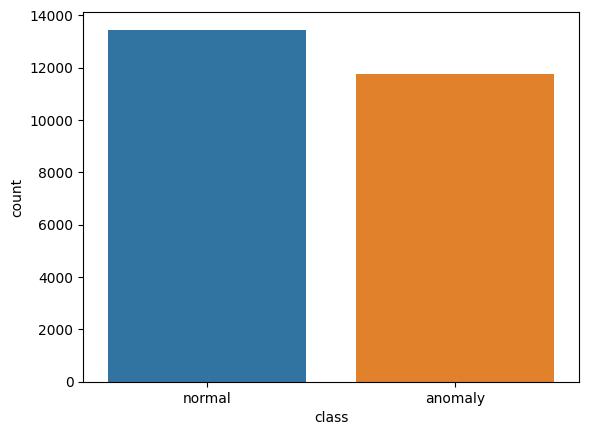

In [16]:
sns.countplot(x=train['class'])

In [17]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [18]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform (df[col])

le(train)
le(test)

In [19]:
train.drop(['num_outbound_cmds'], axis=1, inplace = True)
test.drop(['num_outbound_cmds'], axis=1, inplace = True)

In [20]:
X_train = train.drop (['class'], axis=1)
Y_train = train['class']

In [21]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i , v in feature_map if i==True]
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [22]:
X_train = X_train[selected_features]

In [24]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)

test = scale.fit_transform(test)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [27]:
x_train.shape

(17634, 10)

In [28]:
x_test.shape

(7558, 10)

In [29]:
y_train.shape

(17634,)

In [30]:
y_test.shape

(7558,)

In [31]:
import time

In [32]:
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression (max_iter = 1200000)

start_time = time.time()

clfl.fit(x_train, y_train.values.ravel())

end_time = time.time()

print("Training time: ", end_time-start_time)

Training time:  0.06668472290039062


In [33]:
start_time = time.time()

y_test_pred = clfl.predict(x_train)

end_time = time.time()

print("Testing time: ", end_time-start_time)

Testing time:  0.0044901371002197266


In [35]:
Ig_model = LogisticRegression (random_state = 42)

Ig_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [37]:
Ig_train, Ig_test = Ig_model.score(x_train, y_train), Ig_model.score (x_test, y_test)

print("Training Score: {Ig_train}")

print (f"Test Score: {Ig_test}")

Training Score: {Ig_train}
Test Score: 0.9231278115903678


In [38]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.3 MB/s eta 0:00:00


In [39]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [40]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier (n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score (x_test, y_test)
    return accuracy

In [43]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize (objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9821381317808944], datetime_start=datetime.datetime(2023, 11, 2, 7, 2, 42, 331728), datetime_complete=datetime.datetime(2023, 11, 2, 7, 2, 43, 971506), params={'KNN_n_neighbors': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [52]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN. best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9849155041397301
Test Score: 0.9821381317808944


In [56]:
from sklearn.tree import DecisionTreeClassifier

c1fd = DecisionTreeClassifier (criterion ="entropy", max_depth = 4)
start_time = time.time()
c1fd.fit(x_train, y_train.values.ravel())

end_time = time.time()

print("Training time: ", end_time-start_time)

Training time:  0.058943748474121094


In [60]:
start_time  = time.time()

y_test_pred = c1fd.predict(x_train)

end_time = time.time()

print("Testing time: ", end_time-start_time)

Testing time:  0.010879755020141602


In [61]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier (max_features= dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score (x_test, y_test)
    return accuracy

In [62]:
study_dt = optuna.create_study (direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[0.9958983858163535], datetime_start=datetime.datetime(2023, 11, 2, 7, 15, 3, 347428), datetime_complete=datetime.datetime(2023, 11, 2, 7, 15, 3, 456803), params={'dt_max_depth': 19, 'dt_max_features': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=17, value=None)


In [64]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)
dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)
print(f"Train Score: {dt_train}")
print (f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9936491135220958


In [67]:
data =[["KNN", KNN_train, KNN_test],
       ["Logistic Regression", Ig_train, Ig_test],
       ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.984916 │     0.982138 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.928774 │     0.923128 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.993649 │
╘═════════════════════╧═══════════════╧══════════════╛


In [68]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL
lr = LogisticRegression()

In [72]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['Decision TreeClassifier']= dtc

In [75]:
scores = {}
for name in models:
  scores [name]={}
  for scorer in ['precision','recall']:
    scores [name] [scorer] = cross_val_score (models [name], x_train, y_train, cv=10, scoring=scorer)

In [78]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))
for scorer in ['precision', 'recall']:
  mean = round(np.mean(scores [name] [scorer])*100,2)
  stdev = round(np.std(scores[name] [scorer])*100,2)
  print ("Mean {}:".format(scorer),"\n", mean,"%" , "+-", stdev)
  print()

*************** KNeighborsClassifier Model Validation ***************
**************** LogisticRegression Model Validation ****************
************** Decision TreeClassifier Model Validation **************
Mean precision: 
 99.55 % +- 0.23

Mean recall: 
 99.52 % +- 0.2



<Axes: >

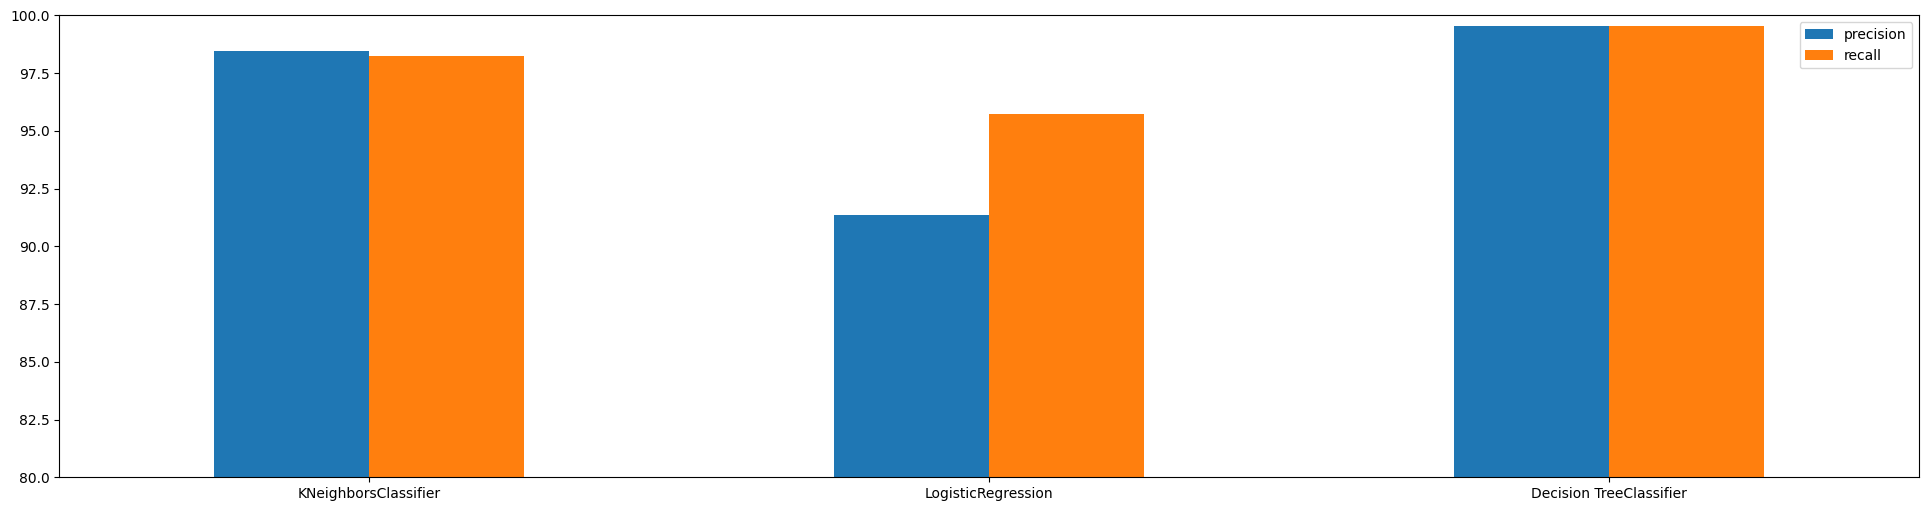

In [81]:
for name in models:
    for scorer in ['precision','recall']:
        scores [name][scorer] = scores [name] [scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar", ylim=[80,100], figsize=(24,6), rot=0)


In [83]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [84]:
preds={}
for name in models:
    models [name].fit(x_train, y_train)
    preds [name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [87]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name, sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line (name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))



*************** KNeighborsClassifier Model Testing ***************
[[3435   63]
 [  65 3995]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      3498
     anamoly       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

**************** LogisticRegression Model Testing ****************
[[3127  371]
 [ 210 3850]]
----------------
              precision    recall  f1-score   support

      normal       0.94      0.89      0.91      3498
     anamoly       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558

************** DecisionTreeClassifier Model Testing **************
[[3484   14]
 [  26 4034]]
--------------
              pr

<Axes: >

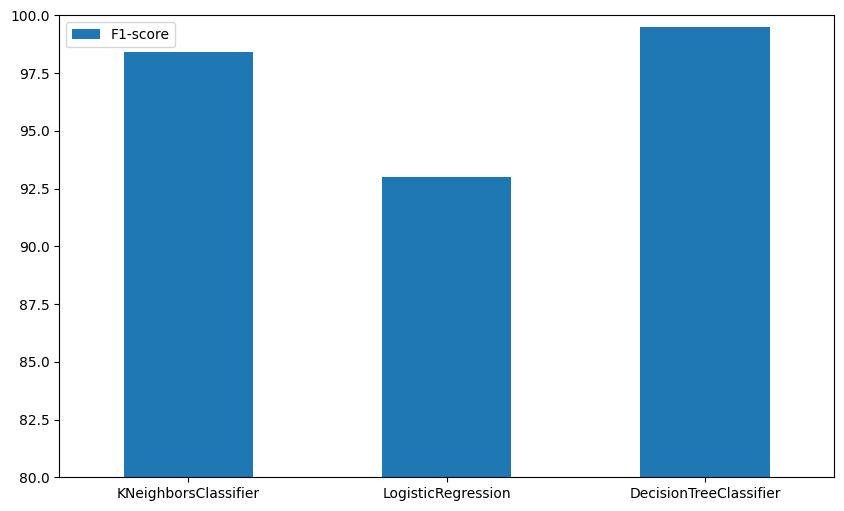

In [91]:
f1s = {}
for name in models:
    f1s [name]=f1_score (y_test, preds [name])
f1s=pd.DataFrame(f1s.values(), index=f1s.keys(), columns=["F1-score"])*100
f1s.plot(kind = "bar", ylim=[80,100], figsize=(10,6), rot=0)
